# PHP - Pulsating Heat Pipe
Data collection and preparation for data analysis and machine learning 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
sns.set()
from ipynb.fs.defs.mdf import DataETL

## Data loading

In [45]:
# loading and cleaning data
df = DataETL('data/data_php_al2o3/')
df

ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [46]:
df.describe()

,Time (Min),Tc - AVG 1&2 (oC),"Te - AVG 1,2,3 (oC)",Pressure (mm of Hg).1,Te - Tc (oC),Q (W),Resistance (oC/W)
count,547.000000,546.000000,546.000000,546.000000,546.000000,546.0,546.000000
mean,27.342779,56.962912,74.352869,665.952711,17.389957,80.0,0.217374
std,16.228761,14.642823,17.273433,278.350756,8.021171,0.0,0.100265
min,0.000000,25.000000,27.000000,260.000000,0.083333,80.0,0.001042
25%,13.500000,46.062500,66.333333,460.000000,12.187500,80.0,0.152344
50%,27.000000,61.000000,80.166667,660.000000,16.541667,80.0,0.206771
75%,40.750000,68.437500,83.666667,760.000000,18.750000,80.0,0.234375
max,61.000000,82.000000,97.333333,1348.480000,36.583333,80.0,0.457292


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time (Min)             547 non-null    float64
 1   Tc - AVG 1&2 (oC)      546 non-null    float64
 2   Te - AVG 1,2,3 (oC)    546 non-null    float64
 3   Pressure (mm of Hg).1  546 non-null    float64
 4   Te - Tc (oC)           546 non-null    float64
 5   Q (W)                  546 non-null    float64
 6   Resistance (oC/W)      546 non-null    float64
dtypes: float64(7)
memory usage: 30.0 KB


<Axes: >

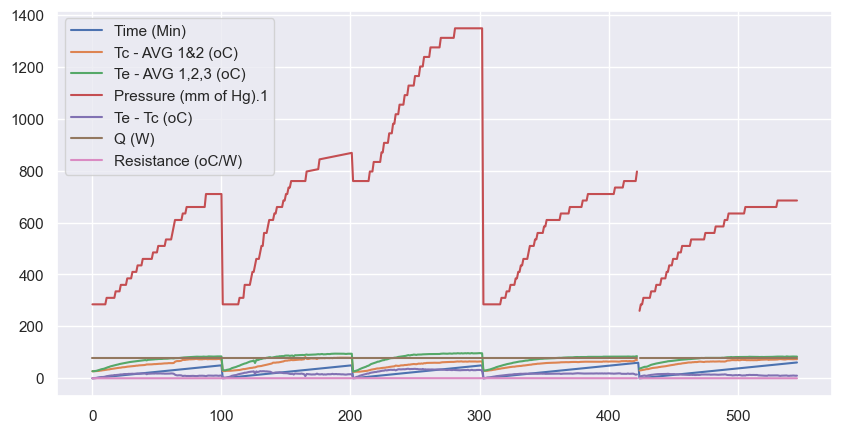

In [48]:
df.plot(figsize=(10,5))

<Axes: title={'center': 'Tc & Te'}>

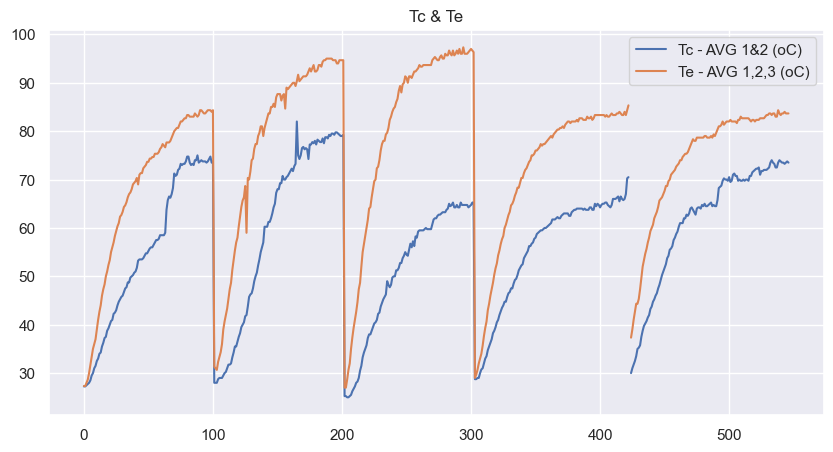

In [49]:
df[['Tc - AVG 1&2 (oC)', 'Te - AVG 1,2,3 (oC)']].plot(style='-',
                                                      figsize=(10,5),
                                                      title = 'Tc & Te')

<Axes: title={'center': 'Resistance'}>

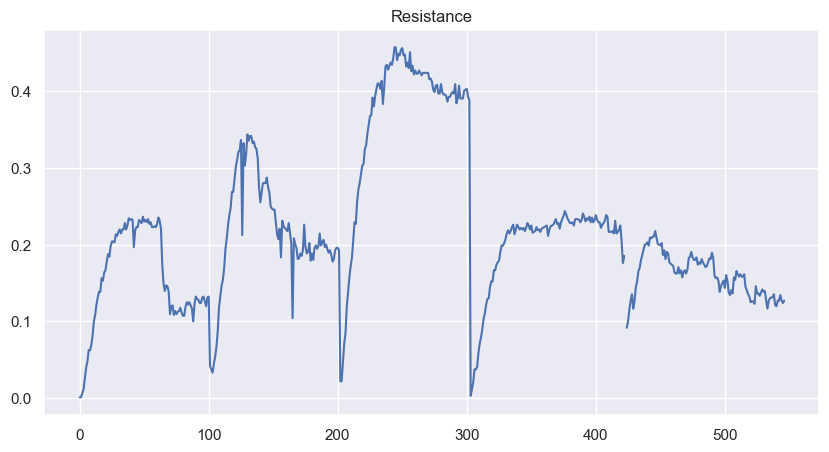

In [50]:
df['Resistance (oC/W)'].plot(style='-',
                             figsize=(10,5),
                             title =  'Resistance')

<Axes: >

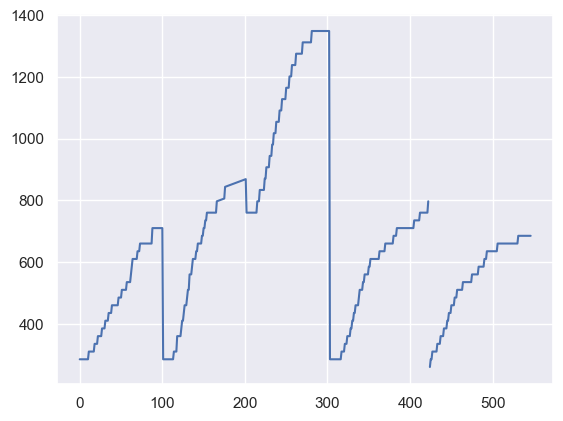

In [51]:
df['Pressure (mm of Hg).1'].plot()